#### Audio Classification Data Preprocessing

In [3]:
import librosa
audio_file_path='C:/Users/diyan/Downloads/UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


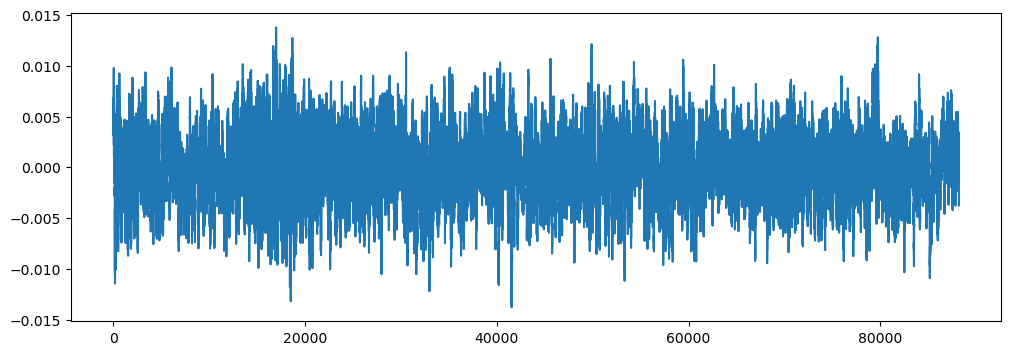

In [5]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [9]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

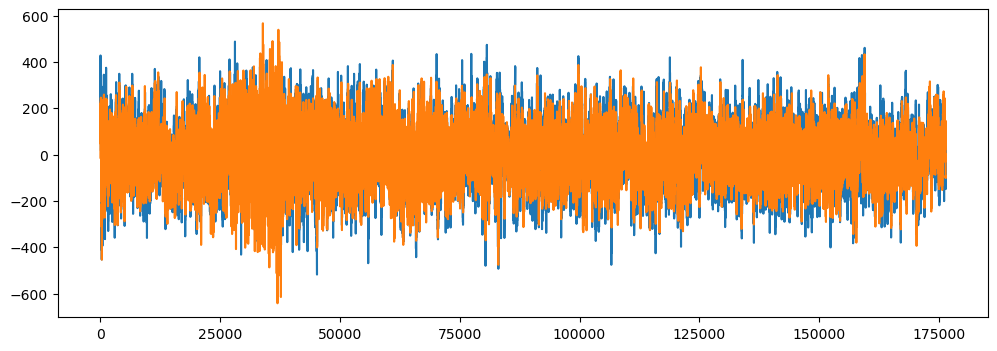

In [10]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features

In [11]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [12]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085260e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299150e+02],
       [-1.8326149e+01, -2.4682453e+01, -3.0259779e+01, ...,
        -8.2357616e+00, -9.0665359e+00, -4.5019574e+00],
       ...,
       [-2.8760443e+00, -3.2479763e+00, -4.8965521e+00, ...,
        -5.2023673e-01,  3.5672522e+00,  7.4937577e+00],
       [-4.2968369e-01, -5.8838767e-01, -8.1724268e-01, ...,
         1.8340671e-01,  7.6732349e-01,  2.7120023e+00],
       [-1.1780636e+00,  6.9809473e-01,  6.3521624e+00, ...,
        -2.6221929e+00, -4.7912703e+00, -3.1826310e+00]], dtype=float32)

In [13]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='C:/Users/diyan/Downloads/UrbanSound8K/audio/'
metadata=pd.read_csv('C:/Users/diyan/Downloads/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [15]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [03:01, 20.35it/s]C:\Users\diyan\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [06:52, 26.88it/s]C:\Users\diyan\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\diyan\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:11, 20.22it/s]


In [16]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [17]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [18]:
X.shape

(8732, 40)

In [19]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [20]:
### Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65353173e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [24]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
X_train.shape

(6985, 40)

In [26]:
X_test.shape

(1747, 40)

In [27]:
y_train.shape

(6985, 10)

In [28]:
y_test.shape

(1747, 10)

### Model Creation

In [29]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
num_labels=y.shape[1]

#### Convolutional Neural Network

In [33]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [35]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
216/219 [============================>.] - ETA: 0s - loss: 10.0235 - accuracy: 0.1115
Epoch 1: val_loss improved from inf to 2.29313, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 9.9523 - accuracy: 0.1118 - val_loss: 2.2931 - val_accuracy: 0.1122
Epoch 2/100
 27/219 [==>...........................] - ETA: 0s - loss: 2.7231 - accuracy: 0.1285

C:\Users\diyan\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/219 [============================>.] - ETA: 0s - loss: 2.5242 - accuracy: 0.1151
Epoch 2: val_loss improved from 2.29313 to 2.28242, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5233 - accuracy: 0.1151 - val_loss: 2.2824 - val_accuracy: 0.1156
Epoch 3/100
207/219 [===========================>..] - ETA: 0s - loss: 2.3264 - accuracy: 0.1315
Epoch 3: val_loss improved from 2.28242 to 2.26618, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3270 - accuracy: 0.1309 - val_loss: 2.2662 - val_accuracy: 0.1271
Epoch 4/100
211/219 [===========================>..] - ETA: 0s - loss: 2.2748 - accuracy: 0.1383
Epoch 4: val_loss improved from 2.26618 to 2.21270, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.2736 - accuracy: 0.1373 - val_loss: 2.2127 - val_accuracy: 0.1574
Epoch 5

In [37]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7321121692657471


In [42]:
# Predict on the test data
y_pred = model.predict(X_test)

# Convert predictions from probabilities to classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test from one-hot to labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
report = classification_report(y_test_labels, y_pred_classes)
print(report)

55/55 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.61      0.91      0.73       195
           1       1.00      0.68      0.81        91
           2       0.50      0.68      0.57       205
           3       0.73      0.65      0.69       182
           4       0.90      0.70      0.79       202
           5       0.87      0.76      0.81       216
           6       1.00      0.44      0.61        87
           7       0.81      0.91      0.86       187
           8       0.93      0.84      0.88       199
           9       0.57      0.54      0.55       183

    accuracy                           0.73      1747
   macro avg       0.79      0.71      0.73      1747
weighted avg       0.77      0.73      0.74      1747



55/55 [==============================] - 0s 3ms/step


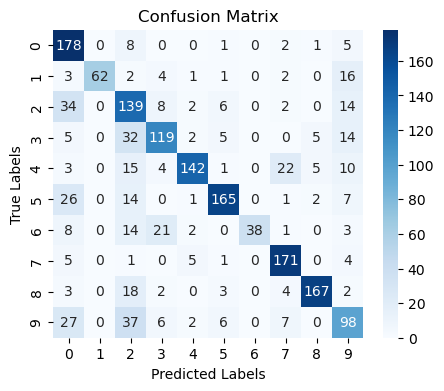

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_classes = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_classes, axis=1)

# Convert y_test from one-hot to labels
y_test_labels = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Feed Forward Neural Network

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model architecture
model = Sequential()
model.add(Dense(512, input_shape=(X.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50
110/110 [==============================] - 2s 9ms/step - loss: 5.4307 - accuracy: 0.1745 - val_loss: 2.1341 - val_accuracy: 0.1860
Epoch 2/50
110/110 [==============================] - 1s 8ms/step - loss: 2.1512 - accuracy: 0.2368 - val_loss: 1.9490 - val_accuracy: 0.3663
Epoch 3/50
110/110 [==============================] - 1s 8ms/step - loss: 1.9936 - accuracy: 0.2855 - val_loss: 1.8266 - val_accuracy: 0.3480
Epoch 4/50
110/110 [==============================] - 1s 8ms/step - loss: 1.8687 - accuracy: 0.3331 - val_loss: 1.6685 - val_accuracy: 0.4390
Epoch 5/50
110/110 [==============================] - 1s 8ms/step - loss: 1.7638 - accuracy: 0.3735 - val_loss: 1.5233 - val_accuracy: 0.4969
Epoch 6/50
110/110 [==============================] - 1s 8ms/step - loss: 1.6739 - accuracy: 0.4030 - val_loss: 1.4484 - val_accuracy: 0.5232
Epoch 7/50
110/110 [==============================] - 1s 8ms/step - loss: 1.5928 - accuracy: 0.4472 - val_loss: 1.3599 - val_accuracy: 0.5587
Epoch 

In [118]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
report = classification_report(y_test, y_pred_classes)
print(report)

55/55 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       203
           1       0.86      0.80      0.83        86
           2       0.78      0.85      0.81       183
           3       0.80      0.81      0.81       201
           4       0.88      0.86      0.87       206
           5       0.92      0.95      0.94       193
           6       0.94      0.82      0.87        72
           7       0.96      0.91      0.93       208
           8       0.85      0.92      0.88       165
           9       0.82      0.78      0.80       230

    accuracy                           0.87      1747
   macro avg       0.87      0.86      0.87      1747
weighted avg       0.87      0.87      0.87      1747



55/55 [==============================] - 1s 11ms/step


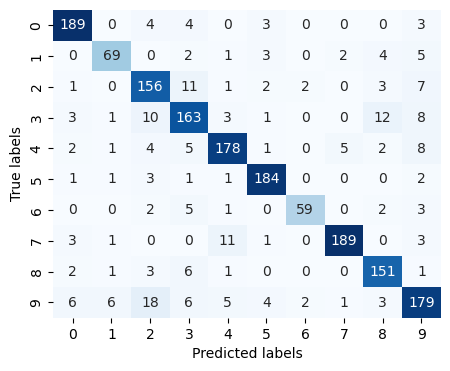

In [99]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### Recurrent Neural Network

In [96]:
from sklearn.preprocessing import LabelEncoder

X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for the LSTM model
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Model architecture
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(np.max(y) + 1, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50
110/110 [==============================] - 7s 49ms/step - loss: 1.9694 - accuracy: 0.2601 - val_loss: 1.7696 - val_accuracy: 0.3497
Epoch 2/50
110/110 [==============================] - 5s 44ms/step - loss: 1.6734 - accuracy: 0.3785 - val_loss: 1.5367 - val_accuracy: 0.4339
Epoch 3/50
110/110 [==============================] - 5s 45ms/step - loss: 1.4381 - accuracy: 0.4899 - val_loss: 1.3484 - val_accuracy: 0.5243
Epoch 4/50
110/110 [==============================] - 5s 44ms/step - loss: 1.2733 - accuracy: 0.5528 - val_loss: 1.2629 - val_accuracy: 0.5650
Epoch 5/50
110/110 [==============================] - 5s 45ms/step - loss: 1.1606 - accuracy: 0.6072 - val_loss: 1.1260 - val_accuracy: 0.6165
Epoch 6/50
110/110 [==============================] - 5s 44ms/step - loss: 1.0375 - accuracy: 0.6524 - val_loss: 1.0561 - val_accuracy: 0.6440
Epoch 7/50
110/110 [==============================] - 5s 44ms/step - loss: 0.9396 - accuracy: 0.6819 - val_loss: 0.8832 - val_accuracy: 0.7178

In [119]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
report = classification_report(y_test, y_pred_classes)
print(report)

55/55 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       203
           1       0.86      0.80      0.83        86
           2       0.78      0.85      0.81       183
           3       0.80      0.81      0.81       201
           4       0.88      0.86      0.87       206
           5       0.92      0.95      0.94       193
           6       0.94      0.82      0.87        72
           7       0.96      0.91      0.93       208
           8       0.85      0.92      0.88       165
           9       0.82      0.78      0.80       230

    accuracy                           0.87      1747
   macro avg       0.87      0.86      0.87      1747
weighted avg       0.87      0.87      0.87      1747



55/55 [==============================] - 1s 11ms/step


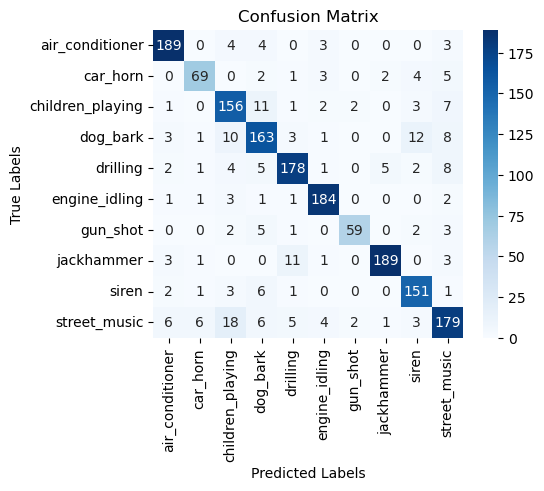

In [104]:
# Predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Testing model with new data

In [60]:
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the audio file
filename = 'C:/Users/diyan/Downloads/UrbanSound8K/sample2.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Load the LabelEncoder and fit it with the available class labels
label_encoder = LabelEncoder()
label_encoder.fit(extracted_features_df['class'])

# Predict on the new input data
predicted_probabilities = model.predict(mfccs_scaled_features)

# Get the class with the highest probability
predicted_label = np.argmax(predicted_probabilities, axis=1)

# Convert the predicted label back to the original class label
predicted_class = label_encoder.inverse_transform(predicted_label)

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 19ms/step
Predicted class: ['dog_bark']
